In [1]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

### data import

In [2]:
def concat_dfs(directory):
    files = glob.glob(directory)
    df = []

    for f in files:   
        col_name = f.split('/')[-1].split('.')[0]
        csv = pd.read_excel(f, names = [col_name], keep_default_na=False)
        csv.reset_index(drop=True, inplace=True)
        df.append(csv)
    
    df2 = pd.concat(df,axis=1)
    return df2.reindex(sorted(df2.columns), axis=1)

In [3]:
living_trees = concat_dfs(r'./data/zywe_drzewa_tabele/*.xls').drop(columns = ['1992', '2003', '2013', '2014'])
living_trees.head()

,2015,2016,2017,2018,2019,2020,2021,2022
0,73.630776,40.733856,55.765217,47.733899,44.712683,68.068858,80.617433,144.036001
1,65.993944,30.052517,59.066688,37.764794,34.545800,73.079181,81.094321,144.094686
2,72.406274,41.399081,51.507782,47.882672,45.013870,63.563303,76.801352,140.200566
3,68.192390,36.628407,50.885907,43.172182,40.277521,63.796179,75.171119,138.578350
4,70.552659,40.196859,49.551987,46.470704,43.663515,61.804577,74.710270,138.115829


In [4]:
dead_trees = concat_dfs(r'./data/martwe_drzewa_tabele/*.xls').drop(columns = ['1993_2003', '2004_2013', '2014'])
dead_trees.head()

,2015,2016,2017,2018,2019,2020,2021,2022
0,3.286743,49.691393,66.533088,62.467834,48.611588,98.525047,124.008671,124.008671
1,2.973508,14.507769,68.030387,70.373049,62.979225,30.179306,109.206454,109.206454
2,4.581918,66.890127,72.418628,65.443224,31.186597,40.847911,113.883070,113.883070
3,2.167089,62.034711,84.857739,19.298963,6.001604,72.520293,111.021580,111.021580
4,6.149053,58.897383,57.784577,48.774192,19.739388,30.088921,17.182465,17.182465


### preview of feature structure

Text(0.5, 0, 'Rok')

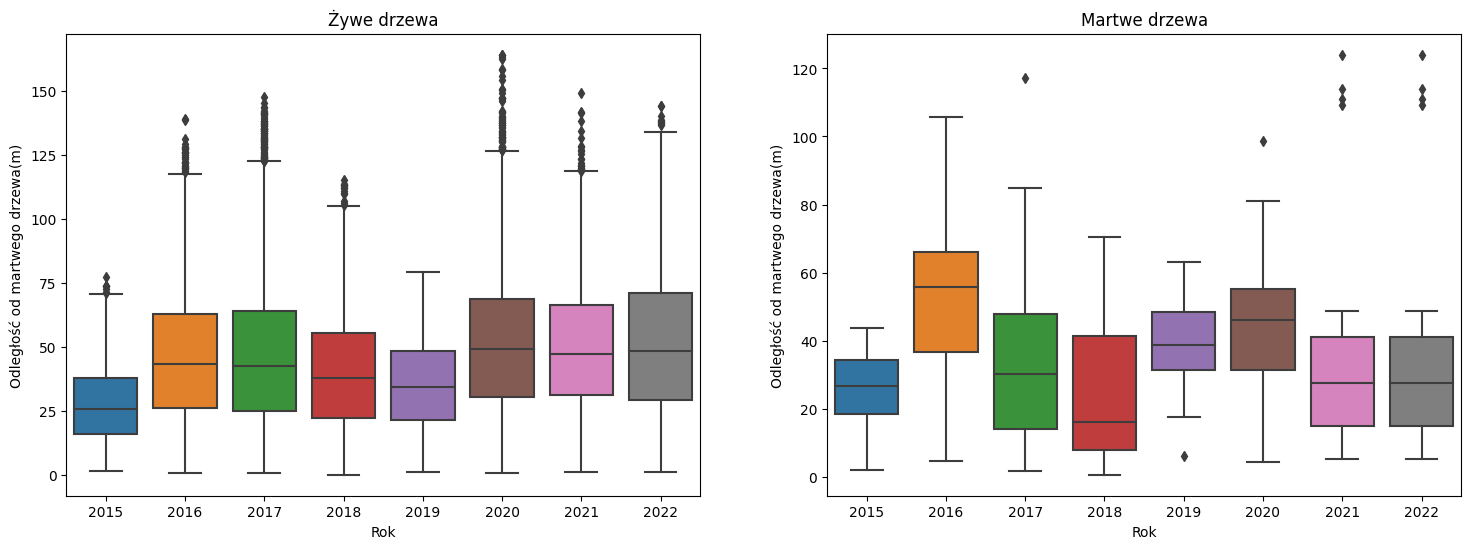

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.boxplot(living_trees, ax=ax[0])

ax[0].set(title='Żywe drzewa')
ax[0].set_ylabel("Odległość od martwego drzewa(m)")
ax[0].set_xlabel("Rok")

sns.boxplot(dead_trees, ax=ax[1])

ax[1].set(title='Martwe drzewa')
ax[1].set_ylabel("Odległość od martwego drzewa(m)")
ax[1].set_xlabel("Rok")

### analysis of stand dieback periods

In [6]:
living_2015_2018 = pd.melt(living_trees[['2015', '2016', '2017', '2018']]).dropna()['value']
living_2019_2022 = pd.melt(living_trees[['2019', '2020', '2021', '2022']]).dropna()['value']
living_2015_2022 = pd.melt(living_trees[['2015', '2016', '2017', '2018' ,'2019', '2020', '2021', '2022']]).dropna()['value']

dead_2015_2018 = pd.melt(dead_trees[['2015', '2016', '2017', '2018']]).dropna()['value']
dead_2019_2022 = pd.melt(dead_trees[['2019', '2020', '2021', '2022']]).dropna()['value']
dead_2015_2022 = pd.melt(dead_trees[['2015', '2016', '2017', '2018' ,'2019', '2020', '2021', '2022']]).dropna()['value']

#### 2015-2018

In [7]:
ks_2samp(living_2015_2018, dead_2015_2018)

KstestResult(statistic=0.09165512767395713, pvalue=0.004064755536857501)

#### 2019-2022

In [8]:
ks_2samp(living_2019_2022, dead_2019_2022)

KstestResult(statistic=0.22067563690473296, pvalue=2.4562131770261772e-05)

#### 2015-2022

In [9]:
ks_2samp(living_2015_2022, dead_2015_2022)

KstestResult(statistic=0.13236046455755957, pvalue=8.274596171969687e-08)